Boston House Prediction Model

In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vikrishnan/boston-house-prices")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vikrishnan/boston-house-prices/versions/1


In [21]:
# Step 1: Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # For normalization
from xgboost import XGBRegressor
from sklearn import metrics

In [22]:
import os

# List files in the downloaded directory
files = os.listdir(path)
print("Files in directory:", files)

Files in directory: ['housing.csv']


In [23]:
dataset_file = os.path.join(path, 'housing.csv')

In [24]:
#Step 2: Loading the Dataset
house_price_dataset = pd.read_csv(dataset_file,header=None)

In [25]:
# Step 3: Understanding the Dataset
print("Dataset Shape:", house_price_dataset.shape)
print("\nMissing Values:\n", house_price_dataset.isnull().sum())
print("\nDataset Description:\n", house_price_dataset.describe())

Dataset Shape: (506, 1)

Missing Values:
 0    0
dtype: int64

Dataset Description:
                                                         0
count                                                 506
unique                                                506
top      0.04741   0.00  11.930  0  0.5730  6.0300  80...
freq                                                    1


In [26]:
# Check the data types of each column
print(house_price_dataset.dtypes)

# Check for non-numeric values in each column
for column in house_price_dataset.columns:
    non_numeric = pd.to_numeric(house_price_dataset[column], errors='coerce').isna()
    if non_numeric.any():
        print(f"Column '{column}' contains non-numeric values:")
        print(house_price_dataset[column][non_numeric])

0    object
dtype: object
Column '0' contains non-numeric values:
0       0.00632  18.00   2.310  0  0.5380  6.5750  65...
1       0.02731   0.00   7.070  0  0.4690  6.4210  78...
2       0.02729   0.00   7.070  0  0.4690  7.1850  61...
3       0.03237   0.00   2.180  0  0.4580  6.9980  45...
4       0.06905   0.00   2.180  0  0.4580  7.1470  54...
                             ...                        
501     0.06263   0.00  11.930  0  0.5730  6.5930  69...
502     0.04527   0.00  11.930  0  0.5730  6.1200  76...
503     0.06076   0.00  11.930  0  0.5730  6.9760  91...
504     0.10959   0.00  11.930  0  0.5730  6.7940  89...
505     0.04741   0.00  11.930  0  0.5730  6.0300  80...
Name: 0, Length: 506, dtype: object


In [27]:
# Step 3: Split the single column into multiple columns
house_price_dataset = house_price_dataset.iloc[:, 0].str.split(expand=True)

# Step 4: Assign column names
column_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
house_price_dataset.columns = column_names
# Convert all columns to numeric, coercing errors to NaN
house_price_dataset = house_price_dataset.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if necessary)
house_price_dataset = house_price_dataset.dropna()

In [28]:
print(house_price_dataset.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   ptratio       b  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


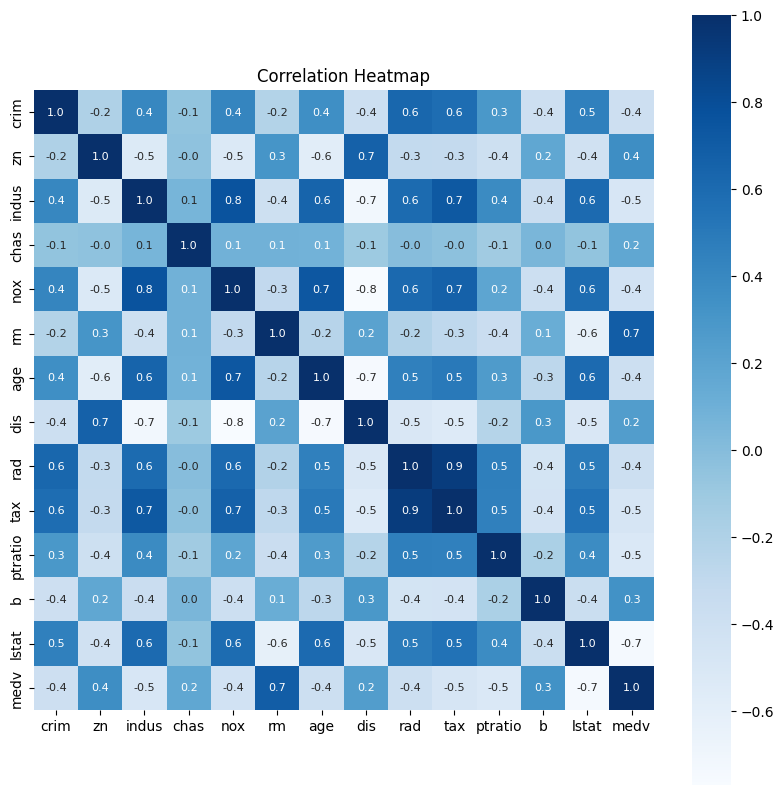

In [29]:
# Step 4: Understanding Correlation
correlation = house_price_dataset.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [31]:
X = house_price_dataset.drop(['medv'], axis=1)
Y = house_price_dataset['medv']

In [32]:
# Step 6: Normalizing the Data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [33]:
#Step 7: Splitting Data into Training and Testing Sets
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=2)
print("\nTraining Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)



Training Data Shape: (404, 13)
Testing Data Shape: (102, 13)


In [34]:
# Step 8: Model Training (XGBoost Regressor with Regularization)
model = XGBRegressor(
    reg_alpha=0.1,  # L1 regularization (alpha)
    reg_lambda=1.0,  # L2 regularization (lambda)
    max_depth=5,     # Limit tree depth to prevent overfitting
    learning_rate=0.1,  # Learning rate
    n_estimators=100  # Number of trees
)
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
# Step 9: Evaluation on Training Data
training_data_pred = model.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_pred)
mae_train = metrics.mean_absolute_error(Y_train, training_data_pred)
print("\nTraining Data Evaluation:")
print("R-squared Error:", r2_train)
print("Mean Absolute Error:", mae_train)


Training Data Evaluation:
R-squared Error: 0.995352349105058
Mean Absolute Error: 0.466369894471499


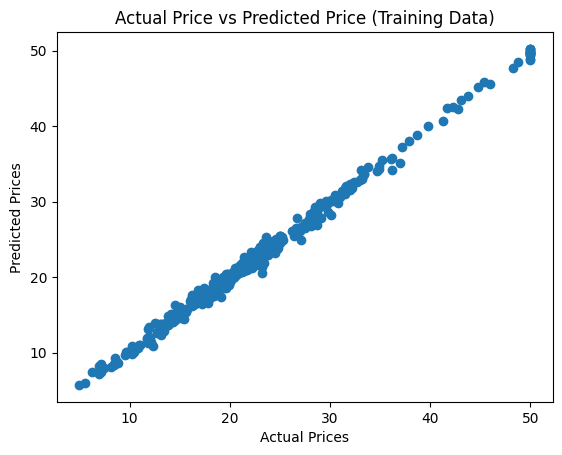

In [36]:
# Step 10: Visualizing Predictions vs Actual Values (Training Data)
plt.scatter(Y_train, training_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price (Training Data)")
plt.show()

In [37]:
# Step 11: Evaluation on Test Data
test_data_pred = model.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_pred)
mae_test = metrics.mean_absolute_error(Y_test, test_data_pred)
print("\nTest Data Evaluation:")
print("R-squared Error:", r2_test)
print("Mean Absolute Error:", mae_test)


Test Data Evaluation:
R-squared Error: 0.9187948728281609
Mean Absolute Error: 1.908851822684793


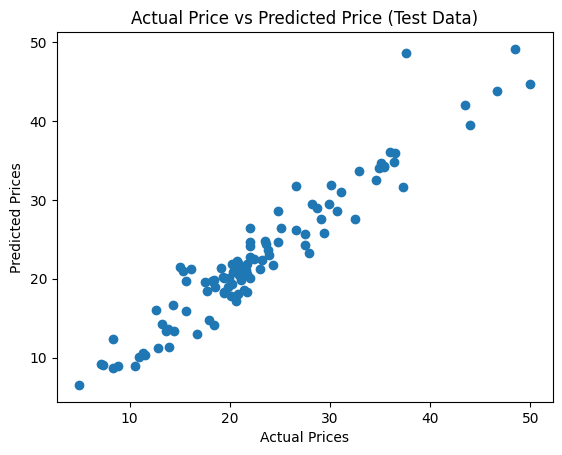

In [38]:
# Step 12: Visualizing Predictions vs Actual Values (Test Data)
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price (Test Data)")
plt.show()

In [40]:
#To determine if the result is truly good, we compare it with a baseline model.
baseline_pred = [Y_test.mean()] * len(Y_test)
r2_baseline = metrics.r2_score(Y_test, baseline_pred)
mae_baseline = metrics.mean_absolute_error(Y_test, baseline_pred)
print("Baseline R-squared Error:", r2_baseline)
print("Baseline Mean Absolute Error:", mae_baseline)

Baseline R-squared Error: 0.0
Baseline Mean Absolute Error: 6.956785851595539
